In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Stars.csv', sep=",")

In [3]:
data.shape

(240, 7)

In [4]:
from sklearn.preprocessing import MinMaxScaler
# MinMax масштабирование
sc1 = MinMaxScaler()
for item in ['Temperature', 'L', 'R', 'A_M']:
    data.loc[:, item] = sc1.fit_transform(data[[item]])
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.029663,2.731275e-09,0.000083,0.876798,Red,M,0
1,0.028980,4.944550e-10,0.000075,0.891807,Red,M,0
2,0.017367,2.590003e-10,0.000048,0.957473,Red,M,0
3,0.022622,1.412729e-10,0.000078,0.893371,Red,M,0
4,0.000000,6.828189e-11,0.000049,1.000000,Red,M,0


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
color_enc = le.fit_transform(data['Color'])
data['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [6]:
np.unique(color_enc)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [7]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

array(['Blue', 'Blue White', 'Blue white', 'Blue-White', 'Blue-white',
       'Orange', 'Orange-Red', 'Pale yellow orange', 'Red', 'White',
       'White-Yellow', 'Whitish', 'Yellowish', 'Yellowish White', 'white',
       'yellow-white', 'yellowish'], dtype=object)

In [8]:
sp_enc = le.fit_transform(data['Spectral_Class'])
data['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [9]:
np.unique(sp_enc)

array([0, 1, 2, 3, 4, 5, 6])

In [10]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6,])

array(['A', 'B', 'F', 'G', 'K', 'M', 'O'], dtype=object)

In [11]:
data['Color']=color_enc
data['Spectral_Class']=sp_enc

In [12]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.029663,2.731275e-09,0.000083,0.876798,8,5,0
1,0.028980,4.944550e-10,0.000075,0.891807,8,5,0
2,0.017367,2.590003e-10,0.000048,0.957473,8,5,0
3,0.022622,1.412729e-10,0.000078,0.893371,8,5,0
4,0.000000,6.828189e-11,0.000049,1.000000,8,5,0


### Разделение выборки на обучающую и тестовую

In [13]:
from sklearn.model_selection import train_test_split
#data_train, data_test = train_test_split(data, random_state=1)
data_train, data_test, data_y_train, data_y_test = train_test_split(data[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']], data['Type'], random_state=1)

In [14]:
# Размер тестовой выборки
data_test.shape, data_y_test.shape

((60, 6), (60,))

In [15]:
# Размер обучающей выборки
data_train.shape, data_y_train.shape

((180, 6), (180,))

In [16]:
from typing import Dict, Tuple
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [17]:
print_class_proportions(data['Type'])

Метка 	 Количество 	 Процент встречаемости
0 	 40 	 	 16.67%
1 	 40 	 	 16.67%
2 	 40 	 	 16.67%
3 	 40 	 	 16.67%
4 	 40 	 	 16.67%
5 	 40 	 	 16.67%


In [18]:
# Для обучающей выборки
print_class_proportions(data_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 31 	 	 17.22%
1 	 31 	 	 17.22%
2 	 30 	 	 16.67%
3 	 26 	 	 14.44%
4 	 34 	 	 18.89%
5 	 28 	 	 15.56%


In [19]:
# Для тестовой выборки
print_class_proportions(data_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 9 	 	 15.0%
1 	 9 	 	 15.0%
2 	 10 	 	 16.67%
3 	 14 	 	 23.33%
4 	 6 	 	 10.0%
5 	 12 	 	 20.0%


### Построение модели на основе метода К ближайших соседей

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# 10 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=10)
cl1_1.fit(data_train, data_y_train)
target1_1 = cl1_1.predict(data_test)
len(target1_1), target1_1

(60,
 array([4, 1, 2, 3, 4, 0, 2, 2, 5, 2, 4, 0, 1, 2, 2, 4, 5, 0, 2, 4, 5, 5,
        4, 4, 4, 4, 0, 0, 2, 2, 2, 4, 2, 2, 4, 2, 3, 1, 4, 5, 1, 2, 5, 2,
        0, 2, 1, 2, 0, 5, 1, 0, 2, 5, 2, 2, 1, 0, 1, 1], dtype=int64))

### Метрики качества классификации
#### 1) Accuracy

In [21]:

from sklearn.metrics import accuracy_score, balanced_accuracy_score
accuracy_score(data_y_test, target1_1)

0.7333333333333333

In [22]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [23]:
print_accuracy_score_for_classes(data_y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 0.14285714285714285
4 	 1.0
5 	 0.6666666666666666


In [24]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [25]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_data_y_train = convert_target_to_binary(data_y_train, 2)
list(zip(data_y_train, bin_data_y_train))[:10]

[(5, 0),
 (2, 1),
 (4, 0),
 (5, 0),
 (5, 0),
 (4, 0),
 (0, 0),
 (5, 0),
 (4, 0),
 (3, 0)]

In [26]:
bin_data_y_test = convert_target_to_binary(data_y_test, 2)
list(zip(data_y_test, bin_data_y_test))[:10]

[(4, 0),
 (1, 0),
 (2, 1),
 (3, 0),
 (3, 0),
 (0, 0),
 (3, 0),
 (2, 1),
 (5, 0),
 (5, 0)]

In [27]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)

In [28]:
balanced_accuracy_score(bin_data_y_test, bin_target1_1)

0.9

#### 2) Матрица ошибок или Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(bin_data_y_test, bin_target1_1, labels=[0, 1])

array([[40, 10],
       [ 0, 10]], dtype=int64)

In [30]:
tn, fp, fn, tp = confusion_matrix(bin_data_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(40, 10, 0, 10)

In [31]:
# Пример для небинарной классификации
confusion_matrix(data_y_test, target1_1, labels=[0, 1, 2, 3, 4, 5])

array([[ 9,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  9,  2,  3,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  1,  0,  3,  8]], dtype=int64)

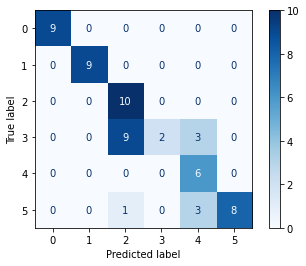

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cl1_1, data_test, data_y_test, 
                       cmap=plt.cm.Blues)

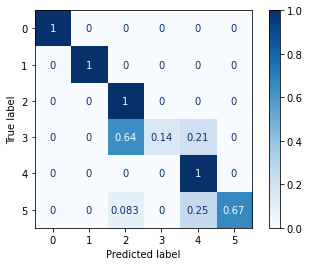

In [42]:
plot_confusion_matrix(cl1_1, data_test, data_y_test,  
                      cmap=plt.cm.Blues, normalize='true')

#### 3) Precision, recall и F-мера

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# По умолчанию метрики считаются для 1 класса бинарной классификации
precision_score(bin_data_y_test, bin_target1_1), recall_score(bin_data_y_test, bin_target1_1)

(0.5, 1.0)

In [46]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(data_y_test, target1_1, average='micro')

0.7333333333333333

In [47]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(data_y_test, target1_1, average='macro')

0.8333333333333334

In [48]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(data_y_test, target1_1, average='weighted')

0.8666666666666667

In [49]:
f1_score(bin_data_y_test, bin_target1_1)

0.6666666666666666

In [50]:
f1_score(data_y_test, target1_1, average='micro')

0.7333333333333333

In [51]:
f1_score(data_y_test, target1_1, average='macro')

0.7305555555555555

In [52]:
f1_score(data_y_test, target1_1, average='weighted')

0.6961111111111111

In [53]:
# Функция classification_report позволяет выводить значения точности, полноты и F-меры для всех классов выборки.
classification_report(data_y_test, target1_1, 
                       output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9},
 '2': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 10},
 '3': {'precision': 1.0,
  'recall': 0.14285714285714285,
  'f1-score': 0.25,
  'support': 14},
 '4': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 6},
 '5': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 12},
 'accuracy': 0.7333333333333333,
 'macro avg': {'precision': 0.8333333333333334,
  'recall': 0.8015873015873015,
  'f1-score': 0.7305555555555555,
  'support': 60},
 'weighted avg': {'precision': 0.8666666666666667,
  'recall': 0.7333333333333333,
  'f1-score': 0.6961111111111111,
  'support': 60}}

#### 4) ROC-кривая и ROC AUC

In [54]:
# Обучим модели на задаче бинарной классифкации, 
# чтобы получить вероятности классов

# 10 ближайших соседа
bin_cl1_1 = KNeighborsClassifier(n_neighbors=10)
bin_cl1_1.fit(data_train, bin_data_y_train)
# предскажем метки классов
bin_cl1_1.predict(data_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [55]:
# Классы возвращаются в следующем порядке
bin_cl1_1.classes_

array([0, 1])

In [56]:
# предскажем вероятности классов
proba_target1_1 = bin_cl1_1.predict_proba(data_test)
len(proba_target1_1), proba_target1_1

(60,
 array([[1. , 0. ],
        [1. , 0. ],
        [0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [0.4, 0.6],
        [1. , 0. ],
        [0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.4, 0.6],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.4, 0.6],
        [0. , 1. ],
        [0.1, 0.9],
        [1. , 0. ],
        [0. , 1. ],
        [0. , 1. ],
        [1. , 0. ],
        [0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [1. , 0. ],
        [0.4, 0.6],
        [1. , 0. ],
        [0.2, 0.8],
        [1. , 0. ],
        [0.2, 0.8],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0

In [57]:
# вероятность единичного (истинного) класса
true_proba_target1_1 = proba_target1_1[:,1]
true_proba_target1_1

array([0. , 0. , 0.6, 0. , 0. , 0. , 0.5, 0.6, 0. , 0.6, 0. , 0. , 0. ,
       0.6, 1. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.6, 1. , 0.9, 0. , 1. , 1. , 0. , 0.6, 0. , 0. , 0. ,
       0.2, 0. , 0.6, 0. , 0.8, 0. , 0.8, 0. , 0.5, 0. , 0. , 0. , 0. ,
       0.7, 0. , 0.6, 0.6, 0. , 0. , 0. , 0. ])

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(bin_data_y_test, true_proba_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.04, 0.04, 0.18, 0.2 , 0.22, 1.  ]),
 array([0. , 0.4, 0.5, 0.5, 0.6, 0.9, 1. , 1. , 1. ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.2, 0. ]))

In [59]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

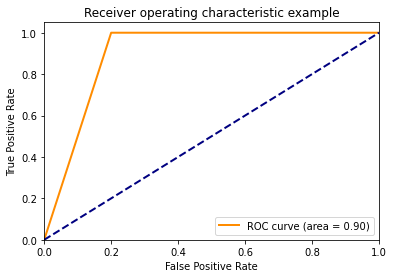

In [60]:
# Для 10 ближайших соседей
draw_roc_curve(bin_data_y_test, bin_target1_1, pos_label=1, average='micro')

### Оптимизация гиперпараметров

In [61]:
#Grid Search (решетчатый поиск)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [62]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(data_train, data_y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [63]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00410161, 0.0046875 , 0.00390625, 0.00312505, 0.00312495,
        0.003125  , 0.00625   , 0.        , 0.009375  , 0.        ]),
 'std_fit_time': array([0.0003906 , 0.00039051, 0.00605154, 0.0062501 , 0.0062499 ,
        0.00625   , 0.00765466, 0.        , 0.00765466, 0.        ]),
 'mean_score_time': array([0.00546865, 0.00566406, 0.00742183, 0.00625   , 0.00625   ,
        0.00625005, 0.00625   , 0.00625   , 0.        , 0.00625005]),
 'std_score_time': array([0.00047834, 0.00039063, 0.00703119, 0.00765466, 0.00765466,
        0.00765471, 0.00765466, 0.00765466, 0.        , 0.00765471]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [64]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier()

In [65]:
# Лучшее значение метрики
clf_gs.best_score_

0.9055555555555557

In [66]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

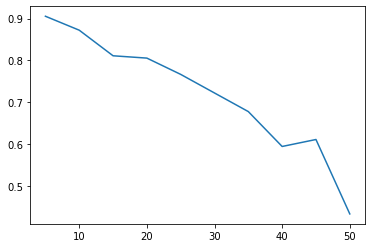

In [67]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [98]:
#Кросс-валидация


from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         data, data['Type'], cv=3)

In [99]:
# Значение метрики accuracy для 3 фолдов
scores

array([0.6  , 0.95 , 0.775])

In [100]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.7749999999999999

In [101]:
# использование метрики f1
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data, data['Type'], cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.74287722, 0.974947  , 0.75629596]), 0.8247067257040847)

In [102]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [103]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data, data['Type'], scoring=scoring, 
                        cv=3, return_train_score=True)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.01953149, 0.00390649, 0.00390625]),
 'score_time': array([0.01074219, 0.01074219, 0.01269531]),
 'test_precision': array([0.83113839, 0.97672619, 0.71177945]),
 'train_precision': array([0.9879547 , 0.99397321, 0.98236607]),
 'test_recall': array([0.775, 0.975, 0.825]),
 'train_recall': array([0.9875 , 0.99375, 0.98125]),
 'test_f1': array([0.74287722, 0.974947  , 0.75629596]),
 'train_f1': array([0.9873754 , 0.99374786, 0.98123664])}

In [104]:
#K-fold стратегия

# Возвращаются индексы элементов
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [105]:
X = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [106]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         data, data['Type'], scoring='f1_weighted', 
                         cv=kf)
scores

array([0.66610963, 0.93535923, 0.93320106, 0.84549297, 0.66911175])

In [107]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=10), 
                        data, data['Type'], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.00488305, 0.00292969, 0.00390625, 0.00390601, 0.00292969]),
 'score_time': array([0.00976562, 0.00878882, 0.00976562, 0.00976586, 0.00976562]),
 'test_precision': array([0.6765873 , 0.94560185, 0.94545455, 0.88034188, 0.61434195]),
 'train_precision': array([0.92690296, 0.9452567 , 0.95053735, 0.90385353, 0.93225524]),
 'test_recall': array([0.66666667, 0.9375    , 0.9375    , 0.85416667, 0.75      ]),
 'train_recall': array([0.92708333, 0.94270833, 0.94270833, 0.890625  , 0.92708333]),
 'test_f1': array([0.66610963, 0.93535923, 0.93320106, 0.84549297, 0.66911175]),
 'train_f1': array([0.92629902, 0.94340139, 0.94256929, 0.88855018, 0.92632801])}

In [108]:
# Repeated K-Fold

X = range(12)
kf = RepeatedKFold(n_splits=3, n_repeats=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1  3  4  5  7  9 10 11] [0 2 6 8]
[ 0  1  2  3  5  6  8 11] [ 4  7  9 10]
[ 0  2  4  6  7  8  9 10] [ 1  3  5 11]
[ 0  1  2  3  4  5  8 10] [ 6  7  9 11]
[ 1  3  6  7  8  9 10 11] [0 2 4 5]
[ 0  2  4  5  6  7  9 11] [ 1  3  8 10]


In [109]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         data, data['Type'], scoring='f1_weighted', 
                         cv=kf)
scores

array([0.76027042, 0.82414917, 0.93600454, 0.88358626, 0.88692834,
       0.85103383])

In [110]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=10), 
                        data, data['Type'], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00488281, 0.00390625, 0.00488305, 0.00488281, 0.00097656,
        0.        ]),
 'score_time': array([0.01171875, 0.01171851, 0.01171851, 0.01074219, 0.015625  ,
        0.01660156]),
 'test_precision': array([0.84418128, 0.89008406, 0.89824634, 0.8598622 , 0.85906433,
        0.93508013]),
 'train_precision': array([0.90068118, 0.9024158 , 0.88648583, 0.89560889, 0.89970313,
        0.88260461]),
 'test_recall': array([0.825 , 0.875 , 0.8875, 0.85  , 0.8375, 0.9125]),
 'train_recall': array([0.8875 , 0.8875 , 0.875  , 0.875  , 0.8875 , 0.86875]),
 'test_f1': array([0.8263694 , 0.87047711, 0.88599705, 0.84902273, 0.83546836,
        0.91293949]),
 'train_f1': array([0.88417521, 0.8852273 , 0.87272186, 0.87494423, 0.88561198,
        0.86533013])}

In [111]:
# Leave One Out (LOO)


X = range(12)
# Эквивалент KFold(n_splits=n)
kf = LeaveOneOut()
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


In [112]:
# ShuffleSplit

X = range(12)
# Эквивалент KFold(n_splits=n)
kf = ShuffleSplit(n_splits=5, test_size=0.25)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[11  1  7  5 10  3  4  8  9] [6 2 0]
[ 7  8 10  3  2  9 11  5  0] [6 4 1]
[ 5  0  9 11  1  2  3  7  4] [ 8 10  6]
[ 7 10  6  3  8  1  5  4  2] [ 0  9 11]
[10  0  7  1  6  8  2 11  4] [3 5 9]
